In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [2]:
# Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")
backup = df.copy()

# Data Understanding

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
import pprint as pp

print(f"There are {len(df.columns)} in dataset & they are : ")
print()
pp.pprint(df.columns)

There are 32 in dataset & they are : 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:

def filter_column_types(df):
    
    numerical_cols = []
    categorical_cols = []

    for col in df.columns:
        
        if df[col].dtype in ['int64','int32','float32','float64']:
            numerical_cols.append(col)
            
        else:
            categorical_cols.append(col)
            
    return numerical_cols, categorical_cols
            
numerical_cols, categorical_cols = filter_column_types(df)

print("The numerical columns are : ")
print()
pp.pprint(numerical_cols)
print()
print()

print("The Categorical columns are : ")
print()
pp.pprint(categorical_cols)

The numerical columns are : 

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


The Categorical columns are : 

['diagnosis']


In [10]:
df[numerical_cols].describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Visualization

In [11]:
numerical_cols = [col for col in numerical_cols if 'id' not in col]
id_ = "id"
if id_ in numerical_cols:
    print("String 'id' is present in numerical_cols.")
else:
    print("String 'id' is not present in numerical_cols.")


String 'id' is not present in numerical_cols.


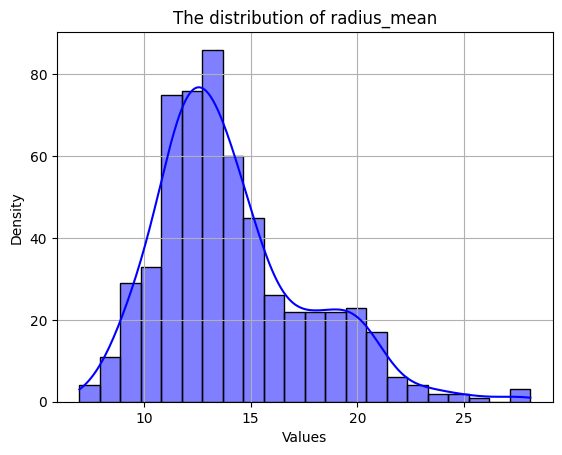

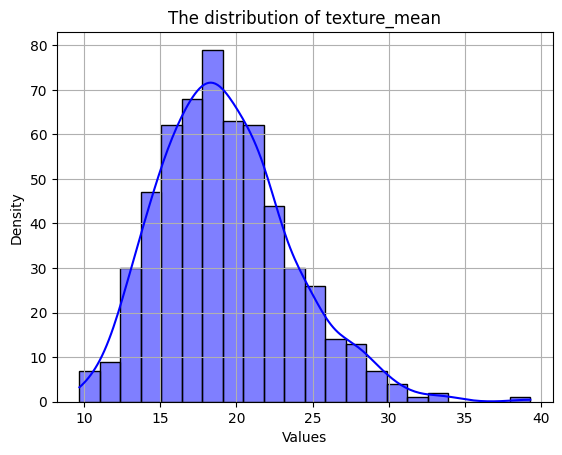

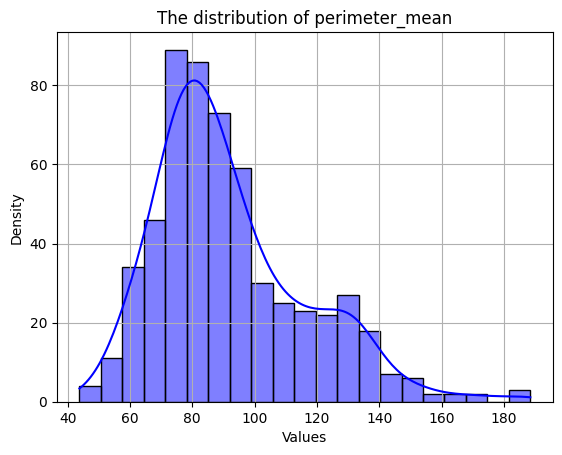

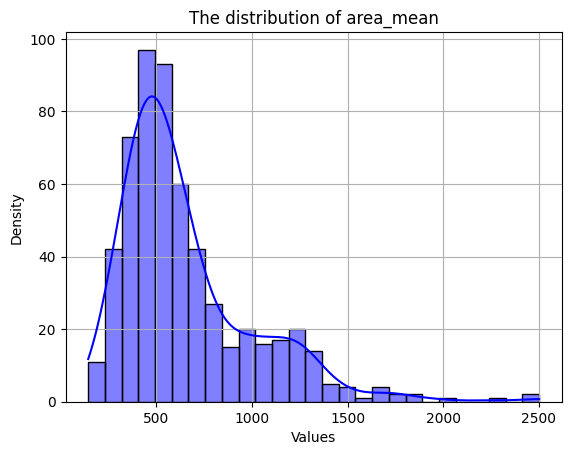

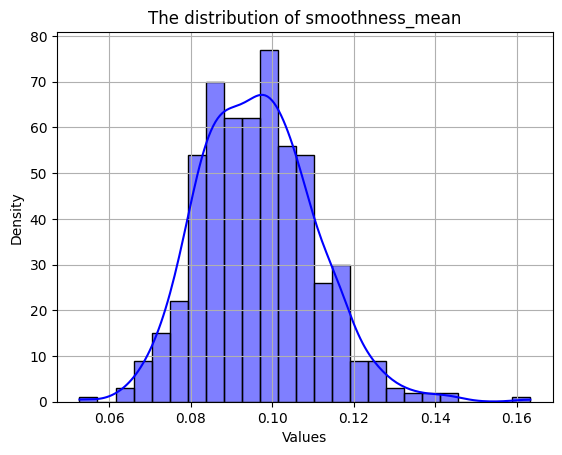

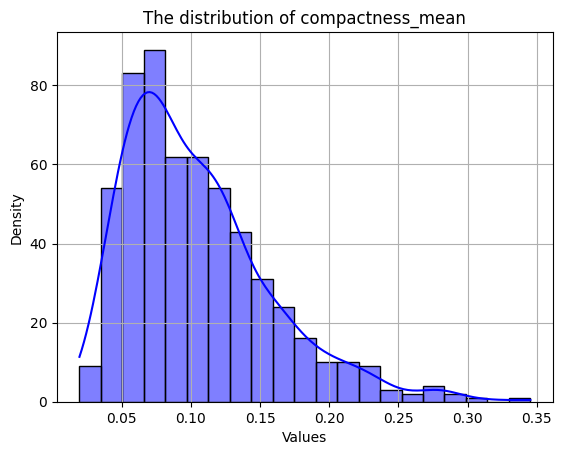

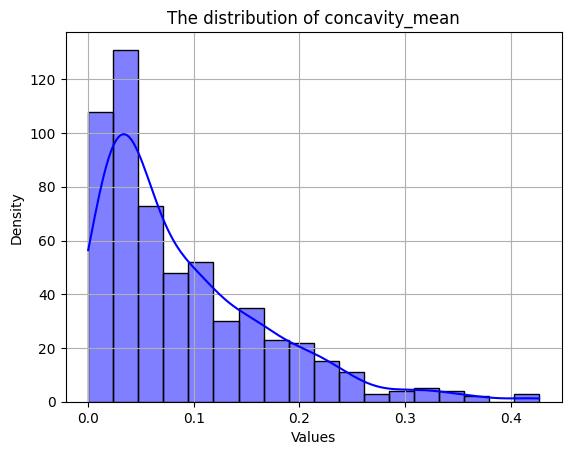

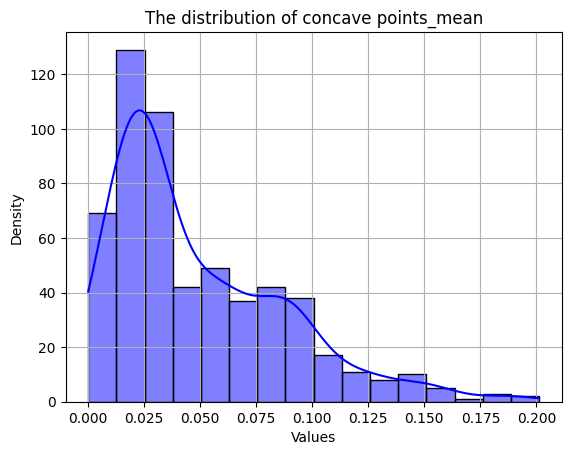

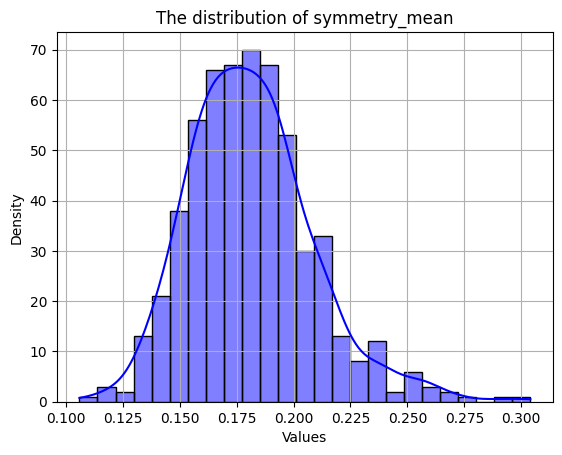

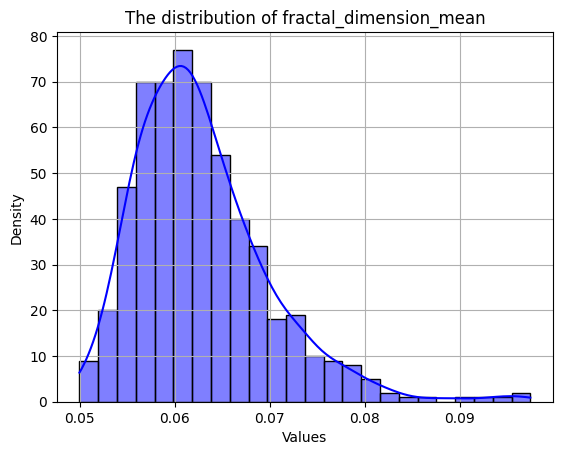

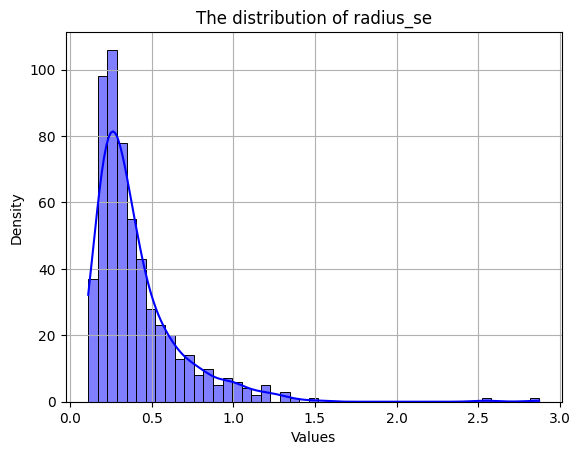

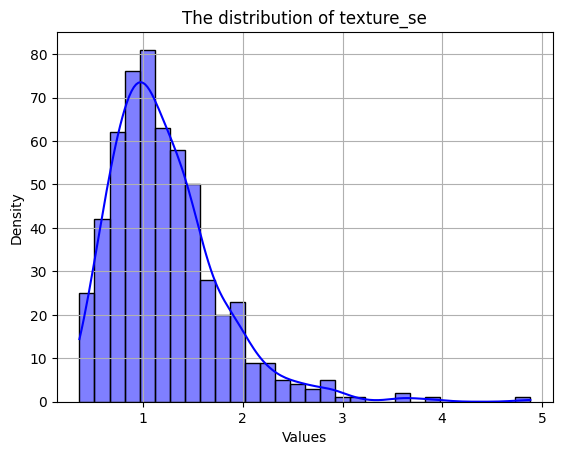

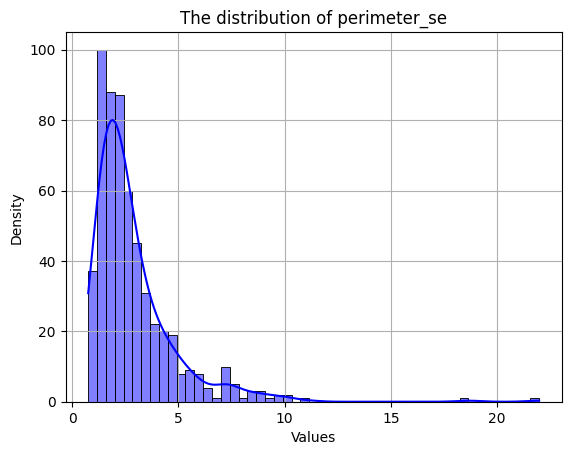

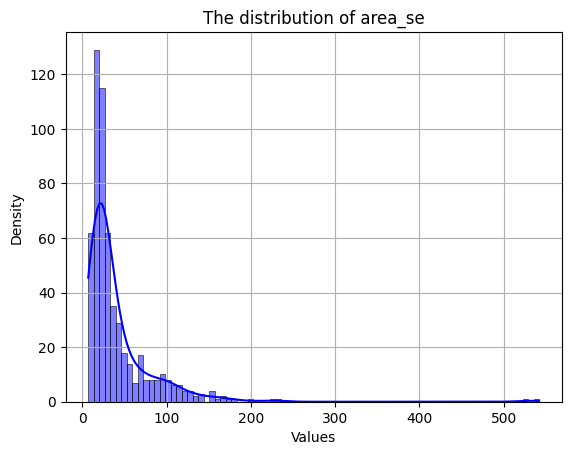

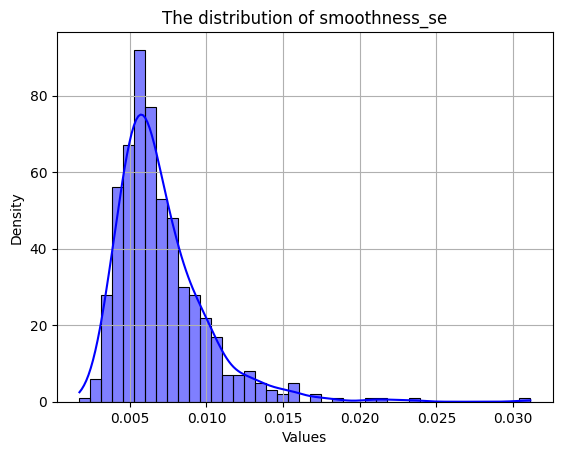

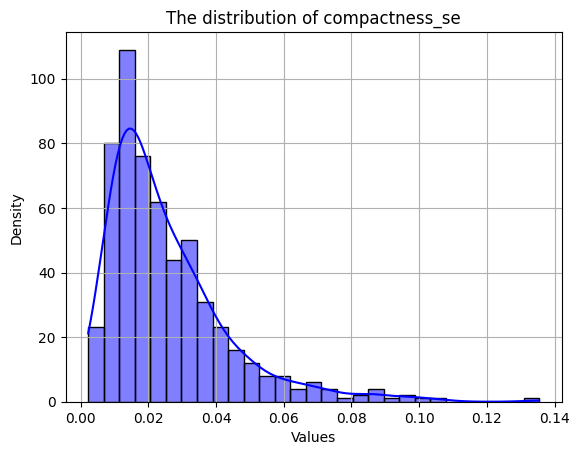

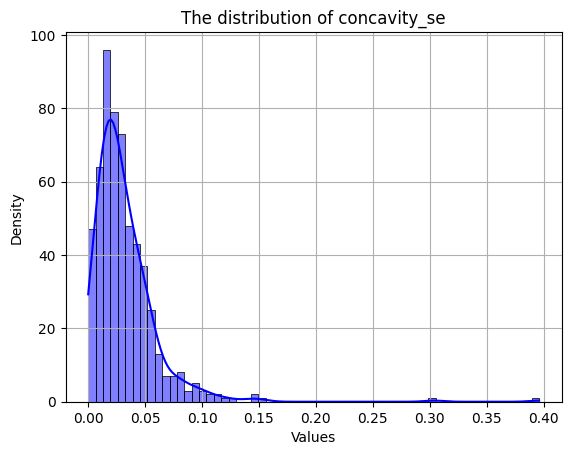

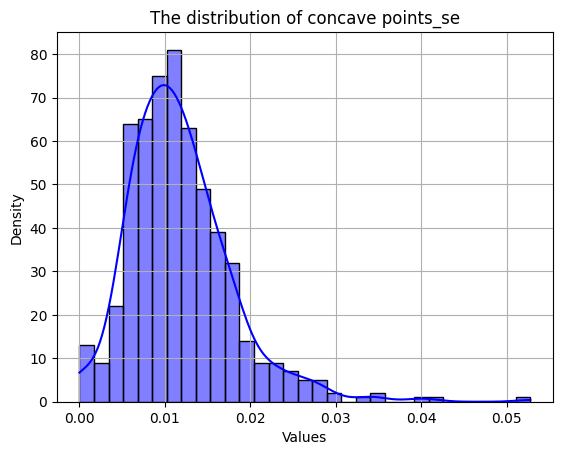

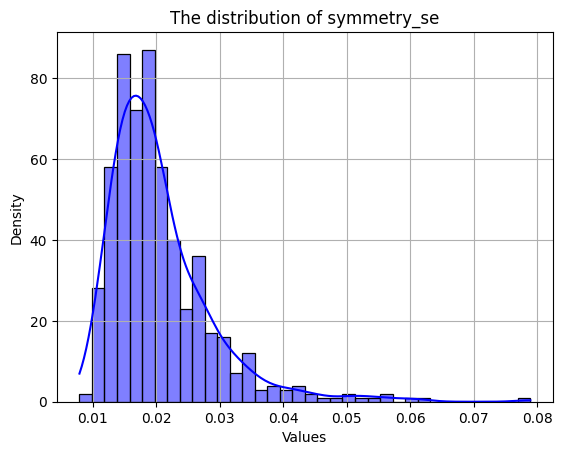

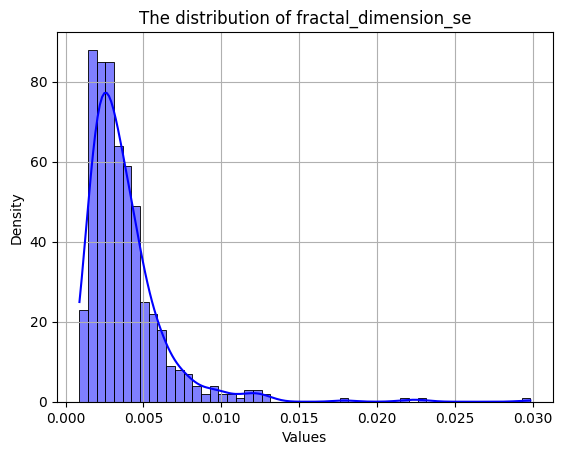

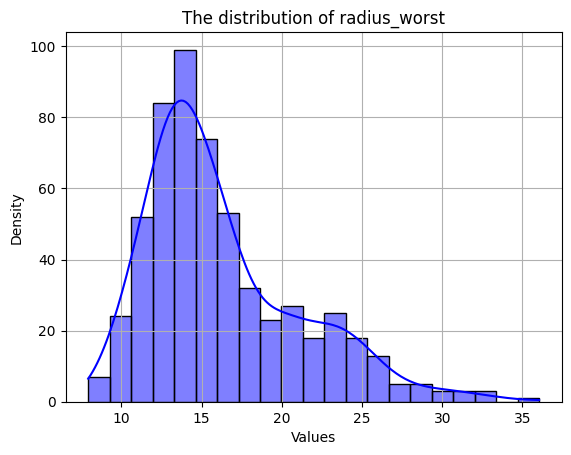

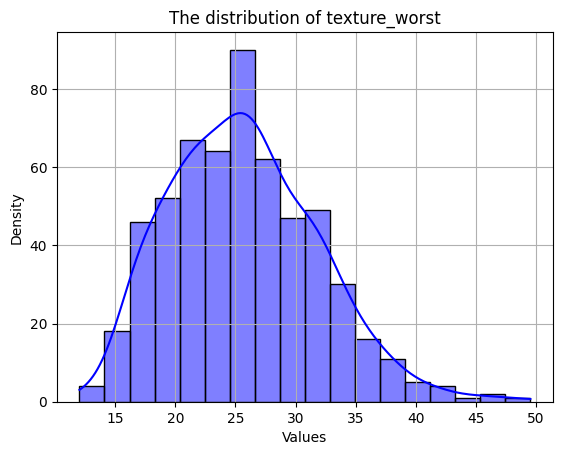

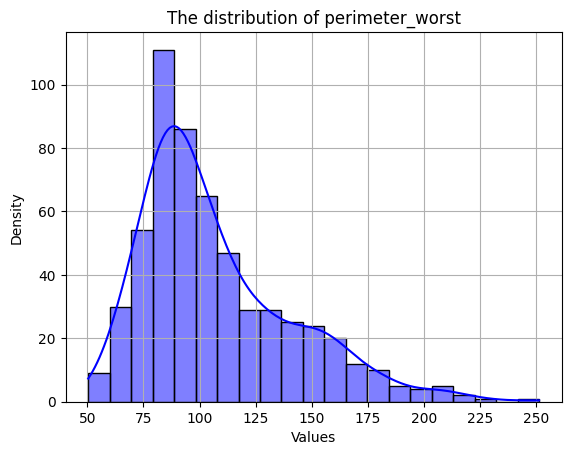

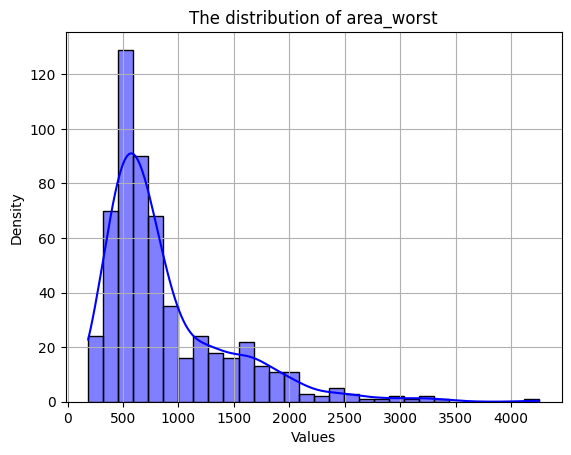

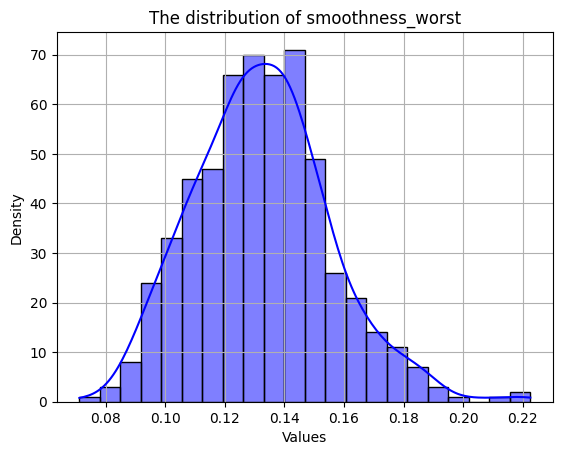

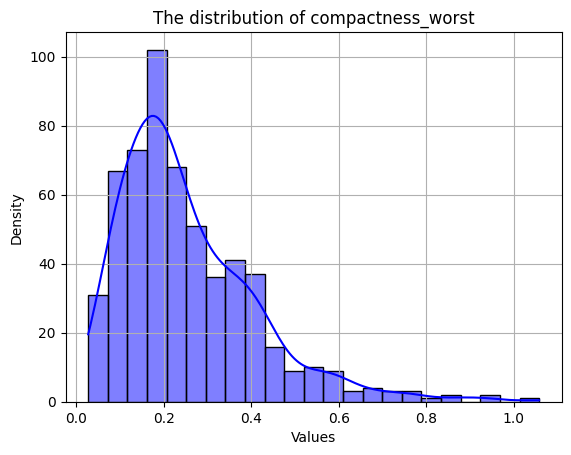

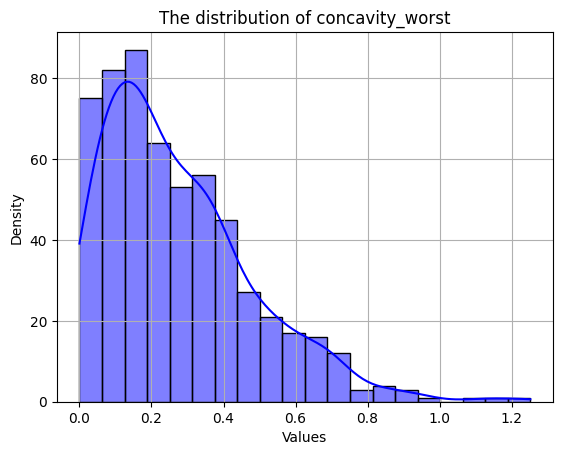

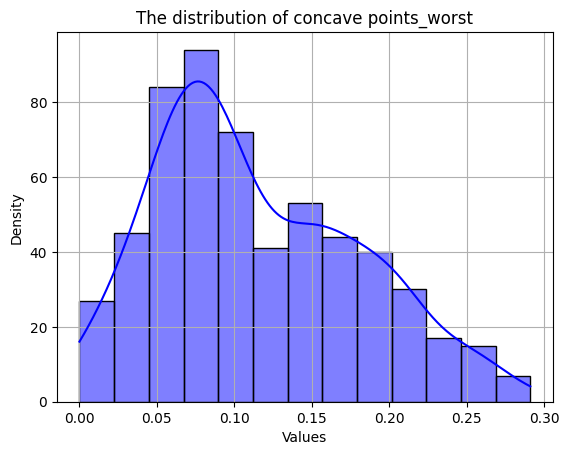

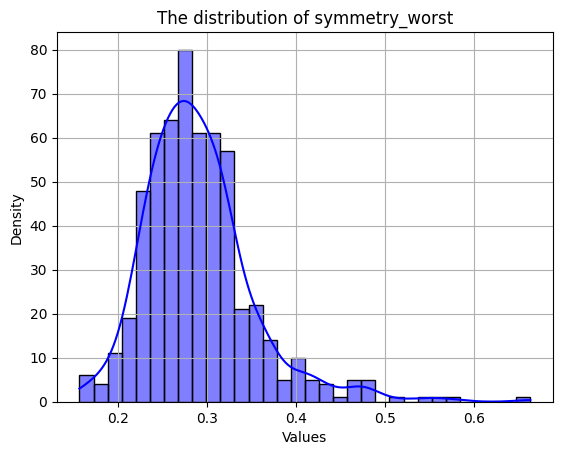

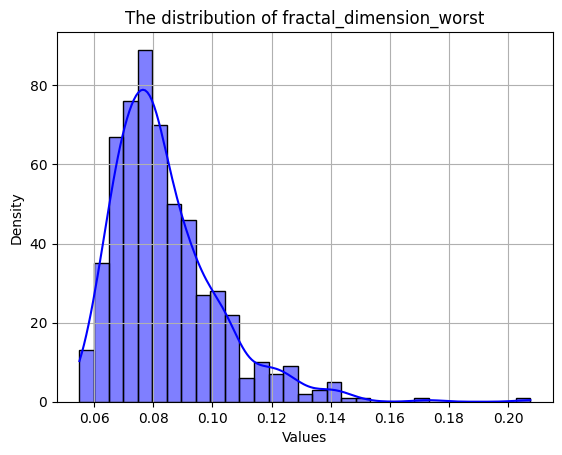

In [12]:
for col in numerical_cols:
    
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"The distribution of {col}")
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

In [13]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

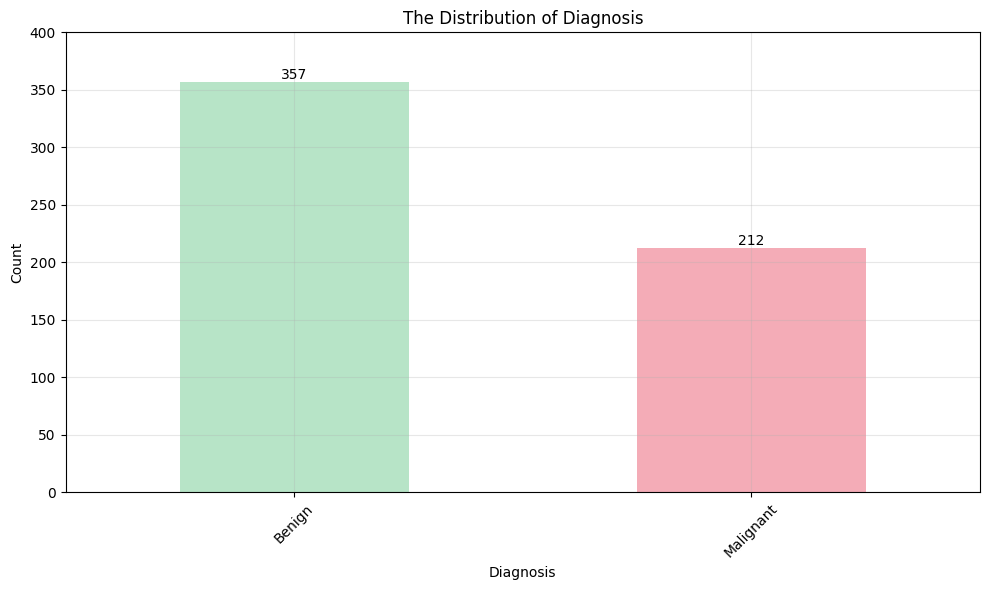

In [14]:
plt.figure(figsize=(10,6))

colors = ['#b7e4c7', '#f4acb7']

df['diagnosis'].value_counts().plot(kind='bar', color=colors)

plt.ylim(0,400)
plt.title(f"The Distribution of Diagnosis")
plt.xlabel('Diagnosis')
plt.ylabel('Count')

for i, count in enumerate(df['diagnosis'].value_counts()):
    plt.text(i, count, str(count), ha="center", va="bottom")
    
custom_labels = ['Benign', 'Malignant']  # Modify these labels as needed
plt.xticks( range(len(custom_labels)), custom_labels,rotation=45)
    
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
labelling = {'M':1, 'B':0}

df['diagnosis'] = df['diagnosis'].replace(labelling)

In [16]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [17]:
df.drop('id', axis=1, inplace=True)


In [18]:
cols_to_standardize = [col for col in df.columns if "diagnosis" not in col]
len(cols_to_standardize)
cols_to_standardize

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [19]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
for col in cols_to_standardize:
    df[col] = rs.fit_transform(df[[col]])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
2,1,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,...,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
3,1,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,...,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
4,1,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,...,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099


# Model Building

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.125 ,random_state=42)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}


cv_scores = {}


for name, model in models.items():
    
    scores = cross_val_score(model, X_train, y_train, cv = 10, scoring="accuracy", n_jobs=-1)
    cv_scores[name] = scores.mean()
    
    print(f"{name} cross-validation score: {round(scores.mean(),5)}")
    print("-"*50)

Logistic Regression cross-validation score: 0.97588
--------------------------------------------------
AdaBoost cross-validation score: 0.94971
--------------------------------------------------
Gradient Boosting cross-validation score: 0.94559
--------------------------------------------------
Random Forest cross-validation score: 0.95567
--------------------------------------------------
MLP cross-validation score: 0.9718
--------------------------------------------------
Decision Tree cross-validation score: 0.91343
--------------------------------------------------
XGBoost cross-validation score: 0.94767
--------------------------------------------------


In [22]:
best_model = max(cv_scores, key=cv_scores.get)
print(f"The best model is: {best_model} with a cross-validation score of {cv_scores[best_model]:.3f} or {(cv_scores[best_model] * 100):.3f} percentage")


The best model is: Logistic Regression with a cross-validation score of 0.976 or 97.588 percentage


# Selecting LogisticRegression Model

In [23]:
logr = LogisticRegression(random_state=42)

model = logr.fit(X_train, y_train)


In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)

print(f"The accuracy Score of {logr.__class__.__name__} is : { accuracy_score(y_test, y_pred):.3f}")

The accuracy Score of LogisticRegression is : 0.986


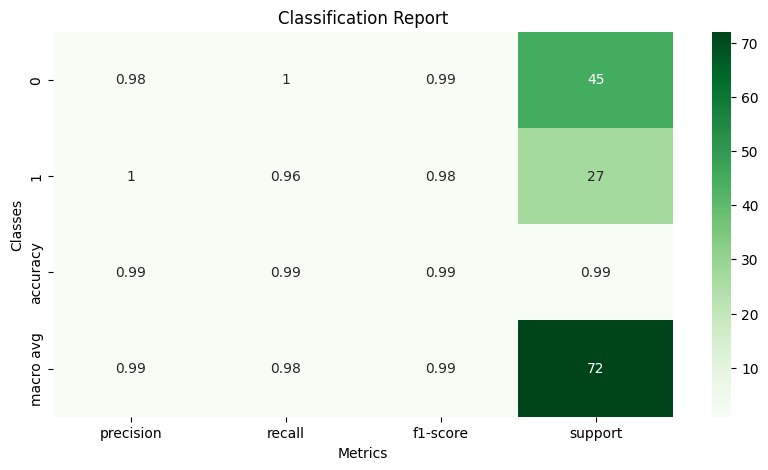

In [25]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(df_report.iloc[:-1, :].astype(float), annot=True, cmap='Greens')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
print(f"The best Hyperparameters are : ",grid_search.best_params_)

The best Hyperparameters are :  {'C': 1}


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


best_C = grid_search.best_params_['C']
best_log_reg = LogisticRegression(C = best_C)

model = best_log_reg.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"The accuracy Score of {best_log_reg.__class__.__name__} is : { accuracy_score(y_test, y_pred):.3f}")

The accuracy Score of LogisticRegression is : 0.986


In [28]:
for index, row in df.iterrows():
    if row['diagnosis'] == 1:  # Assuming 'diagnosis' column contains numerical values
        print(index)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
38
39
40
41
42
43
44
45
47
53
54
56
57
62
64
65
70
72
73
75
77
78
82
83
85
86
87
91
94
95
99
100
105
108
117
118
119
121
122
126
127
129
131
132
134
135
138
141
146
156
161
162
164
167
168
171
172
177
180
181
182
184
186
190
193
194
196
197
198
199
201
202
203
205
207
210
212
213
214
215
218
219
223
229
230
233
236
237
239
244
250
252
253
254
255
256
257
258
259
260
261
262
263
264
265
272
274
277
280
282
283
297
300
302
317
321
323
328
329
330
335
337
339
343
351
352
353
365
366
368
369
370
372
373
379
385
389
392
393
400
408
414
417
430
432
433
435
441
444
446
449
451
460
461
468
479
487
489
492
498
499
501
503
509
512
514
516
517
521
533
535
536
562
563
564
565
566
567


In [32]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Assuming X_test is your test data
# Get one random row from X_test
custom_data = X_test.sample(n=1, random_state=80)

# Edit all features in the custom data
for feature in custom_data.columns:
    # Example: multiply each feature value by 2
    custom_data[feature] *= 2

# Convert custom data to DataFrame
custom_df = pd.DataFrame(custom_data, columns=X_test.columns)

# Initialize a RobustScaler
scaler = RobustScaler()

# Fit the scaler to the training data and transform the custom data
X_custom_scaled = scaler.fit_transform(custom_df)

# Make predictions on the custom data using the trained model
predictions = best_log_reg.predict(X_custom_scaled)

# Print the custom data and predictions
print("Custom Data:")
print(custom_df)
print("\nPredictions:", predictions)


Custom Data:
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
296    -1.205882     -2.305506       -1.182164  -1.034216        -1.129424   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
296         -1.387294       -0.972513             -0.73794      -2.029586   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
296               -0.292162  ...     -1.245675      -2.451389   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
296        -1.222572   -1.034992         -2.597279          -1.426159   

     concavity_worst  concave points_worst  symmetry_worst  \
296        -1.474367             -1.409557       -2.011852   

     fractal_dimension_worst  
296                -1.320078  

[1 rows x 30 columns]

Predictions: [0]
